In [1]:
import os
import numpy as np 
import cv2 
import torch 
import matplotlib.pyplot as plt 

from som_pytorch import self_organizing_map
from som_data import som_data

In [2]:
datapath = "/home/lin/pyProject/pipe-roughness/90/68+/cut_mix"

data = som_data(1.0)
dataset=data.Dataset(datapath,mode="zero-one",sta=10,sto=350,ste=10)

In [2]:
datapath = "/home/lin/pyProject/pipe-roughness/90/203/cut"

data = som_data(1.0)
dataset,bp_set,gp_set=data.Dataset_PN(datapath,mode="zero-one")

In [2]:
datapath = "/home/lin/pyProject/pipe-roughness/90/203/cut"

data = som_data(1.0)
dataset=data.Dataset_mtm(datapath)

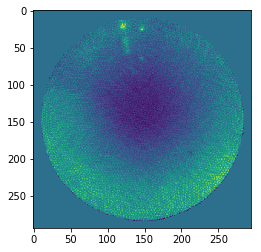

In [4]:

image = dataset[55].numpy()
image = image[:-1].reshape(294,294)
plt.imshow(image)
plt.show()

In [3]:
# 4/12 one path
datapath = "/home/lin/pyProject/pipe-roughness/90/68+/cut_mix/bp"
data = som_data(1.0)
dataset = data.Dataset_S(datapath,mode="min-max",sta=10,sto=350,ste=0)

In [3]:
dims,dataset_len,image_size =data.Parameter()
# data_load = torch.utils.data.DataLoader(dataset,shuffle=True)
# for element in data_load:
#     print(element)
#     break


number of data: 203
dimension of data: 86437
image size: (294, 294)


In [16]:
som = self_organizing_map(m=50,n=1,dims=dims-1,dataset=gp_set,max_epoch=2000,initial_radius=25,initial_learning_rate=0.3,one_pixel_rate=0.7)

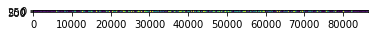

In [5]:
weights_before = np.array(som.Weights_output())
plt.imshow(weights_before)
# plt.colorbar()
plt.show()
# torch.save(weights_before,"save_file/before_210325.pt")

In [17]:
som.Train()

 / 2000 . time: 0.033628296852111814 min.
Epoch: 1621 / 2000 . time: 0.030350645383199055 min.
Epoch: 1622 / 2000 . time: 0.030779170989990234 min.
Epoch: 1623 / 2000 . time: 0.035008597373962405 min.
Epoch: 1624 / 2000 . time: 0.040112260977427164 min.
Epoch: 1625 / 2000 . time: 0.03347944418589274 min.
Epoch: 1626 / 2000 . time: 0.03422145048777262 min.
Epoch: 1627 / 2000 . time: 0.03030922810236613 min.
Epoch: 1628 / 2000 . time: 0.03103956381479899 min.
Epoch: 1629 / 2000 . time: 0.029827411969502768 min.
Epoch: 1630 / 2000 . time: 0.03367791175842285 min.
Epoch: 1631 / 2000 . time: 0.032820733388264973 min.
Epoch: 1632 / 2000 . time: 0.03094017505645752 min.
Epoch: 1633 / 2000 . time: 0.02922292153040568 min.
Epoch: 1634 / 2000 . time: 0.029365944862365722 min.
Epoch: 1635 / 2000 . time: 0.030735631783803303 min.
Epoch: 1636 / 2000 . time: 0.030356001853942872 min.
Epoch: 1637 / 2000 . time: 0.03019768794377645 min.
Epoch: 1638 / 2000 . time: 0.030669760704040528 min.
Epoch: 1639 

In [18]:

weights_after = np.array(som.Weights_output())

In [19]:
trained_weights = som.Weights_output()
torch.save(trained_weights,"save_file/trained_weights_gp_210607.pt")

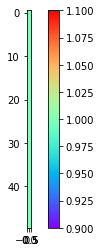

In [20]:
label_map = som.Map_output()
plt.imshow(label_map,"rainbow")
plt.colorbar()
plt.savefig("som_map_colorbar_210607_gp.png")
plt.show()

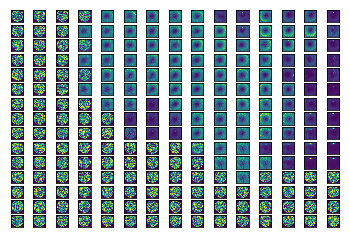

In [11]:
plt.figure()
for i in range(1,15*15+1):
    plt.subplot(15,15,i)
    plt.imshow(weights_after[i-1].reshape(294,294))
    plt.xticks([])
    plt.yticks([])
    # plt.savefig("feature_map_210523.png")
plt.show()

In [2]:
som = self_organizing_map(m=50,n=1,dims=dims-1,dataset=None,max_epoch=20)

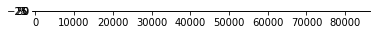

In [40]:
som_weights=torch.load("save_file/trained_weights_bp_210607.pt")
# weights_before = torch.load("save_file/weights_before.pt")
wa = np.array(som_weights)
plt.imshow(wa)
plt.show()

In [42]:
som.Weights_Input(som_weights)

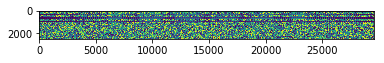

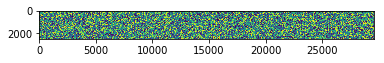

In [5]:
som_map = np.array(som_weights)
plt.imshow(som_map)
plt.show()
b_map = np.array(weights_before)
plt.imshow(b_map)
plt.show()

In [21]:
import data_normalizer_c as dn 

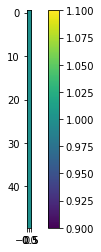

In [22]:
maps = np.copy(som.Map_output())
plt.imshow(maps)
plt.colorbar()
# plt.savefig("som_map_feature_colorbar_210412bp.png")
plt.show()

In [43]:
path = "/home/lin/pyProject/pipe-roughness/90/68+/cut_mix/bp"
# path = "/home/lin/pyProject/pipe-roughness/dab2/bp"
save_path = "clustering_result/0607_bg/87/bp"
file_list = os.listdir(path)
for files in file_list:
    file_path = os.path.join(path,files)
    image = plt.imread(file_path)
    resize_image = cv2.resize(image,(294,294))
    # normal_image = dn.Normalize_circle_minmax(resize_image)
    normal_image = dn.Normalize_circle(resize_image)
    pn_image = dn.position_norm(normal_image)
    input_tensor = torch.tensor(pn_image.flatten())
    x,y = som.Test(input_tensor)
    position = str(x)+"_"+str(y)
    if position not in os.listdir(save_path):
        os.mkdir(save_path+"/"+position)   
    cv2.imwrite(save_path+"/"+position+"/"+files,image)
    maps[x,y] += 2

In [38]:
print("t")

t


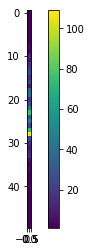

In [28]:
plt.imshow(maps)
plt.colorbar()
# plt.savefig("som_map_t_colorbar_210423.png")
plt.show()

In [36]:
path = "/home/lin/pyProject/pipe-roughness/syn/gp"
path1 = "clustering_result/0607_bg/68+ syn/gp"

t_l = os.listdir(path1)
f_l = os.listdir(path)
p_l = []
fill = []
for t in t_l:
    p_l.append(t[:2])
print(p_l)

for t in t_l:
    if len(os.listdir(os.path.join(path1,t))) >= 10:
        fill.append(t[:2])
print(fill)

for files in f_l:
    file_path = os.path.join(path,files)
    image = plt.imread(file_path)
    resize_image = cv2.resize(image,(294,294))
    # normal_image = dn.Normalize_circle_minmax(resize_image)
    normal_image = dn.Normalize_circle(resize_image)
    pn_image = dn.position_norm(normal_image)
    input_tensor = torch.tensor(pn_image.flatten())
    x,y = som.Test(input_tensor)
    if x in p_l and x not in fill:
        print(x)
        cv2.imwrite(os.path.join(path1,str(x)+"_0",files),image)
        length = len(os.listdir(os.path.join(path1,str(x)+"_0")))
        if length >= 10 and x not in fill:
            fill.append(x)

['23', '22', '32', '14', '26', '18', '10', '27', '33', '28', '25', '19', '13', '24']
['28']


KeyboardInterrupt: 

In [38]:
position_list = []
for x,y in np.argwhere(maps==2):
    position_list.append((x,y))
print(position_list)
p_file=open("save_file/position_list.csv",mode="a")
p_file.write("210327\n")
p_file.write("OK Position,")
# p_file.write("NG Position,")
p_file.write(str(position_list))
p_file.write("\n")
p_file.close()

[(9, 8), (10, 7), (10, 10), (10, 12), (11, 8), (11, 9), (11, 11), (11, 13), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11), (12, 12), (12, 14), (13, 6), (13, 7), (13, 8), (13, 9), (13, 10), (13, 11), (13, 12), (13, 13), (14, 8), (14, 9), (14, 10), (14, 11), (14, 12), (14, 13), (14, 14), (14, 16), (15, 5), (15, 6), (15, 7), (15, 8), (15, 10), (15, 11), (15, 12), (15, 13), (15, 14), (16, 4), (16, 5), (16, 6), (16, 9), (16, 10), (16, 11), (16, 12), (16, 13), (16, 15), (17, 4), (17, 5), (17, 6), (17, 7), (17, 8), (17, 9), (17, 10), (17, 11), (17, 12), (17, 13), (17, 16), (18, 2), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 12), (18, 13), (18, 14), (18, 15), (19, 4), (19, 7), (19, 8), (19, 9), (19, 10), (19, 11), (19, 12), (19, 14), (19, 16)]


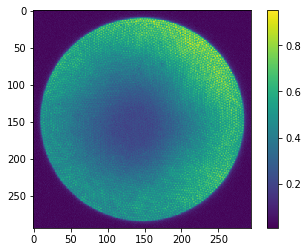

In [24]:
img = weights_after[250]
re_img = img.reshape((294,294))
plt.imshow(re_img)
plt.colorbar()
plt.savefig("trained_weight_circle.png")
plt.show()


In [29]:
# similiarly test
path1 = "/home/lin/pipe_classifier_by_miTech/05_cnn_v3/dataset_pipe/test_dataset"
path2 = "clustering_result/0412/gp/lb"

list1 = os.listdir(path1)
list2 = os.listdir(path2)

print(list1)
print(list2)

FileNotFoundError: [Errno 2] No such file or directory: 'clustering_result/0412/gp/lb'

In [28]:
fp = open("save_file/similary_0412gp.csv",mode="w")
for dirs in list2:
    f_list2 = os.listdir(os.path.join(path2,dirs))
    
    for target in list1:
        counter = 0
        f_list1 = os.listdir(os.path.join(path1,target))
        for names in f_list2:
            if names in f_list1:
                counter+=1
        fp.write(dirs+","+target+","+str(counter)+","+str(len(f_list1))+","+str(counter/len(f_list1))+"\n")
fp.close()

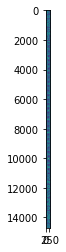

True

In [37]:
som_weights=torch.load("save_file/trained_weights_gp_210607.pt")
maps = som_weights.numpy()
img = np.zeros((294*50,294*1),dtype=float)
for x in range(50):
    for y in range(1):
        # num = 15*x+y
        num = x
        # x=0
        w=som_weights[num].reshape(294,294)
        for u in range(294):
            for v in range(294):
                # img[x*294+u,y*294+v]=w[u,v]
                img[x*294+u,v]=w[u,v]
plt.imshow(img)
plt.show()
cv2.imwrite("0607_gp.png",50*img+60)

In [12]:
image = plt.imread("0430.png")
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.savefig("0430_fig.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '0428.png'